In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
data = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [3]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
data.drop('id',axis=1,inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [6]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## Total values for stroke

0    4861
1     249
Name: stroke, dtype: int64

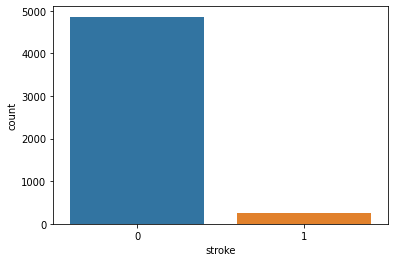

In [7]:
sns.countplot(data = data, x='stroke')
data['stroke'].value_counts()

## Is there a missing value?

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

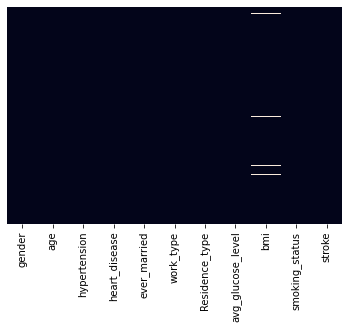

In [8]:
sns.heatmap(data.isnull(),cbar=False,yticklabels=False)
data.isnull().sum()

## Should we drop or replace the null values from bmi?

In [9]:
data['bmi'].count()

4909

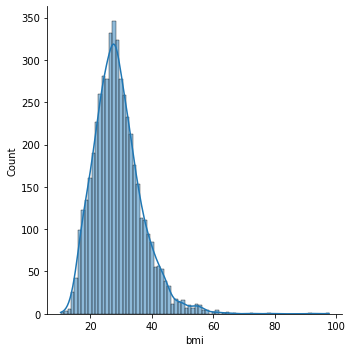

In [10]:
sns.displot(data['bmi'], kde=True)

<AxesSubplot:>

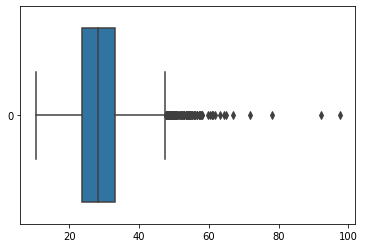

In [11]:
sns.boxplot(data = data['bmi'], orient='h')

In [12]:
#considering the distribution plot the distribution is rigth skewed, and upon checking boxplot the distribution
#is closed symmetric to the median
#mean = 28.89
#mode = 28.7
#median = 28.1
#considering the mean, median,mode, they are greatly closed to each other
#therefore we can replace the null values with the mean of bmi

In [13]:
data['bmi'].mode()

0    28.7
dtype: float64

In [14]:
data['bmi'].mean()

28.893236911794673

In [15]:
data['bmi'].median()

28.1

In [16]:
data['bmi'].min()

10.3

In [17]:
data['bmi'].max()

97.6

In [18]:
data[data['bmi']==97.6]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2128,Male,17.0,1,0,No,Private,Rural,61.67,97.6,Unknown,0


In [19]:
data[data['bmi']==10.3]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1609,Female,1.24,0,0,No,children,Rural,122.04,10.3,Unknown,0


In [20]:
data.fillna(value=data.mean(),inplace=True)

## Does bmi affect the chance of having a stroke?

<AxesSubplot:xlabel='stroke', ylabel='bmi'>

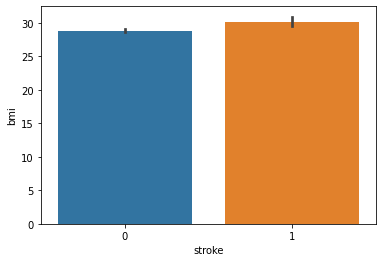

In [21]:
sns.barplot(data=data,x='stroke',y='bmi',estimator=np.mean)
#base on the barplot, considering the mean of those who have and don't have stroke are closer to each other
#so we can initialy conclude that bmi does not increase the chance of having stroke
#we can dig deeper to our initial analysis

<AxesSubplot:xlabel='bmi', ylabel='stroke'>

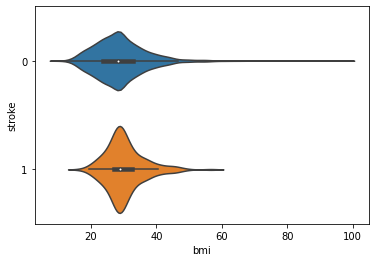

In [22]:
sns.violinplot(data=data,x='bmi',y='stroke',orient='h')
#considering the violinplot the mean of people who have and don't have stroke are closer to each other interms of bmi

In [23]:
data[data['stroke']==1]['bmi'].mean()

30.217789062135694

In [24]:
data[data['stroke']==0]['bmi'].mean()

28.82538801538764

In [25]:
data[data['stroke']==0]['bmi'].mode()

0    28.893237
dtype: float64

In [26]:
data[data['stroke']==0]['bmi'].median()

28.3

## Can we conclude that people who is in adolosenece stage have higher bmi?

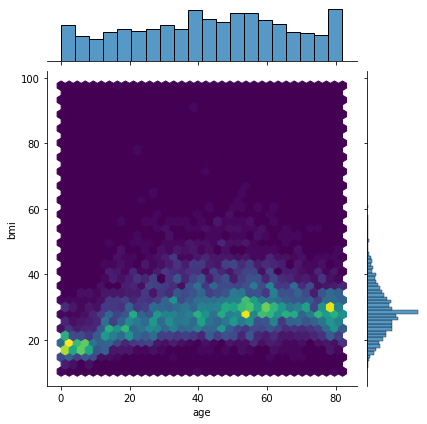

In [27]:
sns.jointplot(data=data,x='age',y='bmi',kind='hex',cmap='viridis')

In [28]:
data[(data['bmi'] == data['bmi'].min()) | (data['bmi']==data['bmi'].max())]
#base on the hexbin plot, bmi is not dependent on the age of a person

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1609,Female,1.24,0,0,No,children,Rural,122.04,10.3,Unknown,0
2128,Male,17.00,1,0,No,Private,Rural,61.67,97.6,Unknown,0


## Does age greatly affect the chance of having stroke?

<AxesSubplot:xlabel='stroke', ylabel='age'>

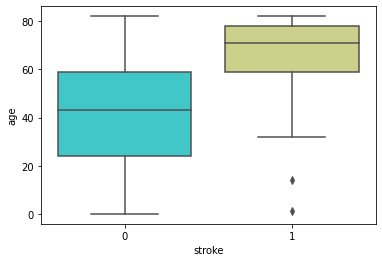

In [29]:
sns.boxplot(data=data,x='stroke',y='age',palette='rainbow')
#according to our boxplot people whos age is ranging from 60-80 have higher chance of having stroke

In [30]:
data[(data['age'] < 50) & (data['stroke'] == 1)]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3,Female,49.00,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
31,Male,42.00,0,0,Yes,Private,Rural,83.41,25.400000,Unknown,1
34,Male,48.00,0,0,No,Govt_job,Urban,84.20,29.700000,never smoked,1
39,Female,49.00,0,0,Yes,Private,Urban,60.91,29.900000,never smoked,1
49,Female,39.00,1,0,Yes,Private,Rural,58.09,39.200000,smokes,1
63,Female,45.00,0,0,Yes,Private,Rural,93.72,30.200000,formerly smoked,1
79,Male,43.00,0,0,Yes,Self-employed,Urban,143.43,45.900000,Unknown,1
88,Male,47.00,0,0,Yes,Private,Urban,86.94,41.100000,formerly smoked,1
94,Male,45.00,0,0,Yes,Private,Rural,64.14,29.400000,never smoked,1
113,Female,45.00,0,0,Yes,Private,Rural,224.10,56.600000,never smoked,1


In [31]:
data[(data['age'] > 50) & (data['stroke'] == 1)]
#base on the number of rows of people who's age is less than 50 and experience stroke had a count of 20, on the other hand 
#people who's age is greater than 50 had a count of 226

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.000000,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
243,Female,68.0,1,1,Yes,Private,Urban,247.51,40.500000,formerly smoked,1
244,Male,57.0,0,0,Yes,Private,Rural,84.96,36.700000,Unknown,1
246,Female,75.0,0,0,Yes,Self-employed,Rural,78.80,29.300000,formerly smoked,1
247,Male,71.0,1,0,Yes,Self-employed,Rural,87.80,28.893237,Unknown,1


## Do people who experience hypertension have greater chance of having a stroke?

<AxesSubplot:xlabel='hypertension', ylabel='count'>

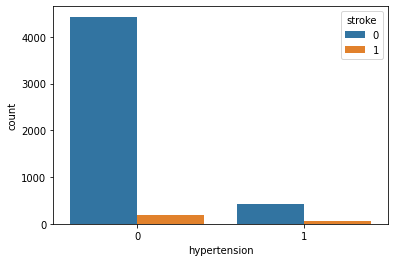

In [32]:
sns.countplot(x ='hypertension',hue='stroke',data=data)
#according to our plot, people who experience hypertension does not increase the chance of having a storke

In [33]:
data[(data['stroke']==1) & (data['hypertension']==1)].count()

gender               66
age                  66
hypertension         66
heart_disease        66
ever_married         66
work_type            66
Residence_type       66
avg_glucose_level    66
bmi                  66
smoking_status       66
stroke               66
dtype: int64

In [34]:
data[(data['stroke']==1) & (data['hypertension']==0)].count()

gender               183
age                  183
hypertension         183
heart_disease        183
ever_married         183
work_type            183
Residence_type       183
avg_glucose_level    183
bmi                  183
smoking_status       183
stroke               183
dtype: int64

## Is having a heart disease increases the chance of having a stroke?

<AxesSubplot:xlabel='heart_disease', ylabel='count'>

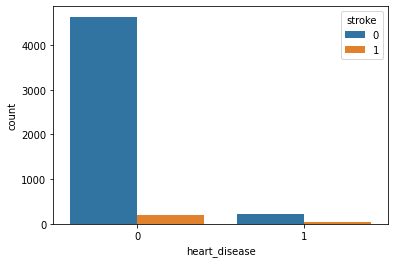

In [35]:
sns.countplot(x ='heart_disease',hue='stroke',data=data)
#according to our plot, people who had heart disease does not increase the chance of having a storke

In [36]:
temp = []

In [37]:
data['heart_disease'].value_counts().to_frame().values.flatten()

array([4834,  276], dtype=int64)

In [38]:
data['heart_disease'].value_counts()
temp.append(data['heart_disease'].value_counts())

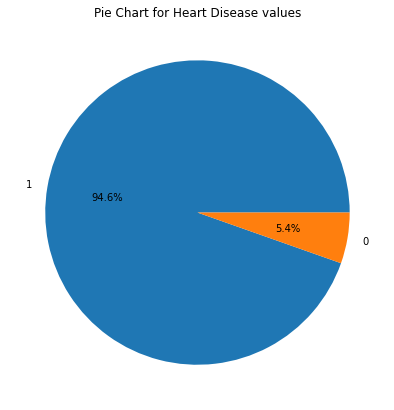

In [39]:
plt.figure(figsize=(7,7))
plt.pie(data['heart_disease'].value_counts(),labels=['1','0'],autopct='%.1f%%')
plt.title('Pie Chart for Heart Disease values')
plt.plot();

In [40]:
data[(data['stroke']==1) & (data['heart_disease']==1)].count()

gender               47
age                  47
hypertension         47
heart_disease        47
ever_married         47
work_type            47
Residence_type       47
avg_glucose_level    47
bmi                  47
smoking_status       47
stroke               47
dtype: int64

In [41]:
data[(data['stroke']==1) & (data['heart_disease']==0)].count()

gender               202
age                  202
hypertension         202
heart_disease        202
ever_married         202
work_type            202
Residence_type       202
avg_glucose_level    202
bmi                  202
smoking_status       202
stroke               202
dtype: int64

## Does Residence Type effect the chance of having a stroke?

<AxesSubplot:xlabel='Residence_type', ylabel='count'>

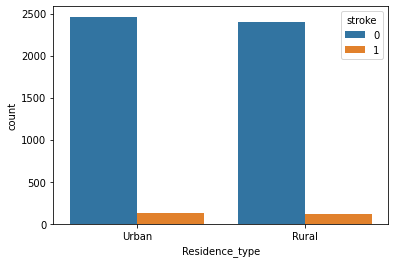

In [42]:
sns.countplot(x ='Residence_type',hue='stroke',data=data)
#base on our analysis, people who lived in Uraban area have a slight chance to experience a stroke

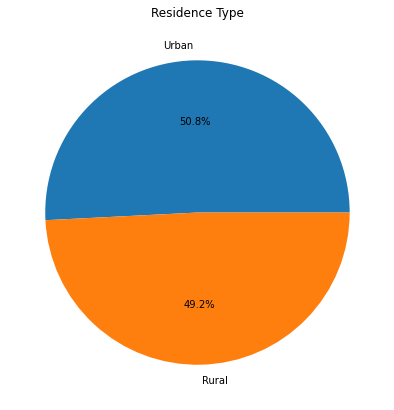

In [43]:
plt.figure(figsize=(7,7))
plt.pie(data['Residence_type'].value_counts(),labels=data['Residence_type'].unique(),autopct='%.1f%%')
plt.title('Residence Type')
plt.plot();

In [44]:
data[(data['stroke']==1) & (data['Residence_type']=='Urban')].count()

gender               135
age                  135
hypertension         135
heart_disease        135
ever_married         135
work_type            135
Residence_type       135
avg_glucose_level    135
bmi                  135
smoking_status       135
stroke               135
dtype: int64

In [45]:
data[(data['stroke']==1) & (data['Residence_type']=='Rural')].count()

gender               114
age                  114
hypertension         114
heart_disease        114
ever_married         114
work_type            114
Residence_type       114
avg_glucose_level    114
bmi                  114
smoking_status       114
stroke               114
dtype: int64

## Does having different work type increases the risk of having a stroke?

<AxesSubplot:xlabel='work_type', ylabel='count'>

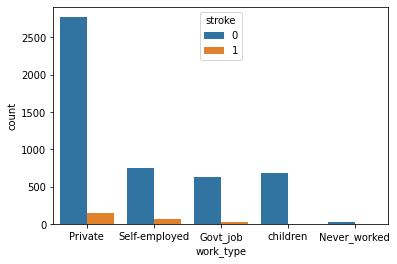

In [46]:
sns.countplot(x ='work_type',hue='stroke',data=data)
#base on work type, people who are work in private company have the higher chance to experience stroke among the rest

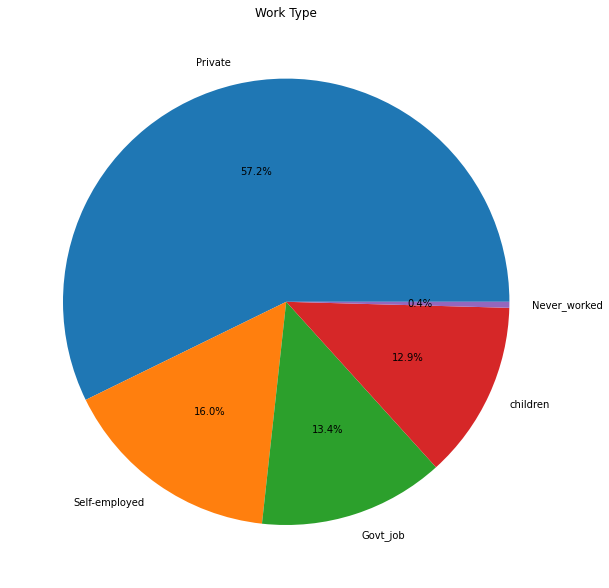

In [47]:
plt.figure(figsize=(10,15))
plt.pie(data['work_type'].value_counts(),labels=data['work_type'].unique(),autopct='%.1f%%')
plt.title('Work Type')
plt.plot();

In [48]:
data[(data['stroke']==1) & (data['work_type']=='Self-employed')].count()

gender               65
age                  65
hypertension         65
heart_disease        65
ever_married         65
work_type            65
Residence_type       65
avg_glucose_level    65
bmi                  65
smoking_status       65
stroke               65
dtype: int64

In [49]:
data[(data['stroke']==1) & (data['work_type']=='Govt_job')].count()

gender               33
age                  33
hypertension         33
heart_disease        33
ever_married         33
work_type            33
Residence_type       33
avg_glucose_level    33
bmi                  33
smoking_status       33
stroke               33
dtype: int64

In [50]:
data[(data['stroke']==1) & (data['work_type']=='children')]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
162,Female,1.32,0,0,No,children,Urban,70.37,28.893237,Unknown,1
245,Female,14.00,0,0,No,children,Rural,57.93,30.900000,Unknown,1


In [51]:
data[(data['stroke']==1) & (data['work_type']=='Never_worked')].count()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

## Is being Married increase the chance of having a stroke?

<AxesSubplot:xlabel='ever_married', ylabel='count'>

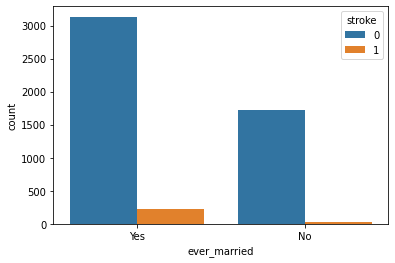

In [52]:
sns.countplot(x ='ever_married',hue='stroke',data=data)
#base on status, we can initially conclude that being married people have more number of getting stroke

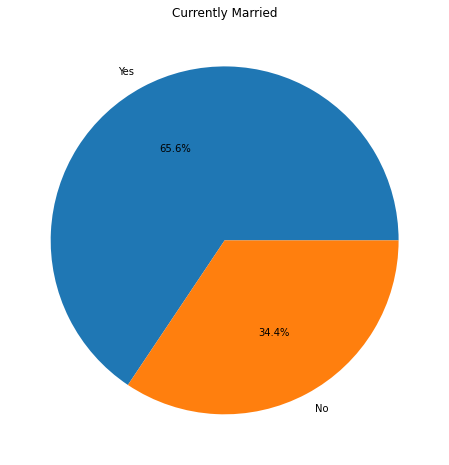

In [53]:
plt.figure(figsize=(8,8))
plt.pie(data['ever_married'].value_counts(),labels=data['ever_married'].unique(),autopct='%.1f%%')
plt.title('Currently Married')
plt.plot();

## If being married slightly increase the chance of having stroke, then it is dependent on age?

<AxesSubplot:xlabel='ever_married', ylabel='age'>

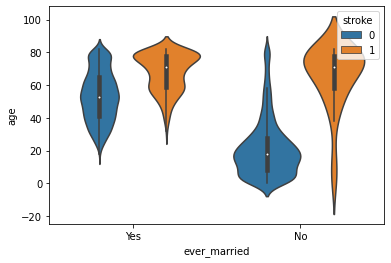

In [54]:
sns.violinplot(x ='ever_married',y='age',hue='stroke',data=data)
#base on the violin plot, being married does not increase the chance of experiencing stroke,
#therefore we can conclude that age is one of the main factor of experiencing stroke

<AxesSubplot:xlabel='age', ylabel='ever_married'>

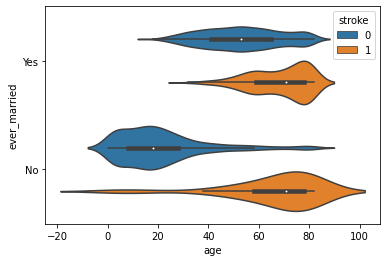

In [55]:
sns.violinplot(x ='age',y='ever_married',hue='stroke',data=data,orientation='h')

In [56]:
data[(data['ever_married']=='Yes') & (data['stroke']==1)]['age'].mean()

68.0409090909091

In [57]:
data[(data['ever_married']=='No') & (data['stroke']==1)]['age'].mean()

65.35586206896552

## Does average glucose level affect the risk of having a stroke?

<AxesSubplot:xlabel='avg_glucose_level', ylabel='stroke'>

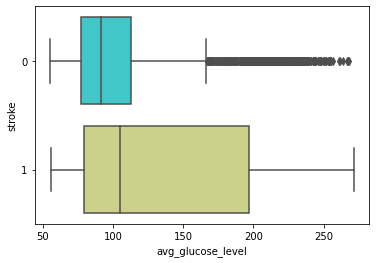

In [58]:
sns.boxplot(data=data,x='avg_glucose_level',y='stroke',palette='rainbow',orient='h')
#base on the distribution we can clearly see that avg_glucose_level greatly effect the chance of having a stroke

## Since average glucose level influence the chance of experiencing stroke, then does it mean that upon aging average glucose level is also increasing?

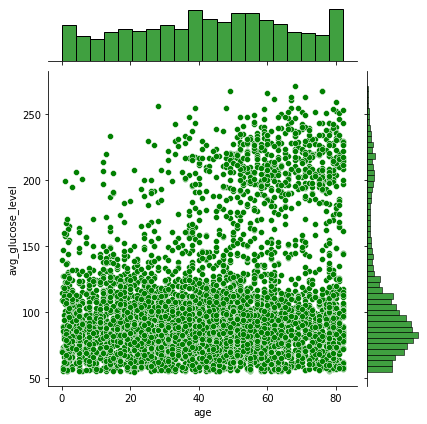

In [59]:
sns.jointplot(data=data,x='age',y='avg_glucose_level',kind='scatter',color='green')
#base on the plot, we can conclude that as we go older, average glucose level can also increase that can influence the
#chances of having a stroke

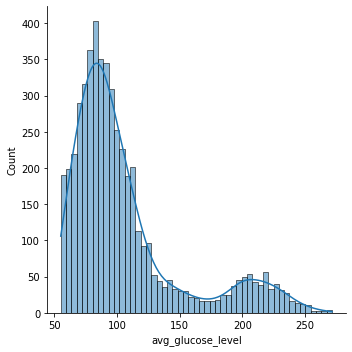

In [60]:
sns.displot(data["avg_glucose_level"],kde=True)

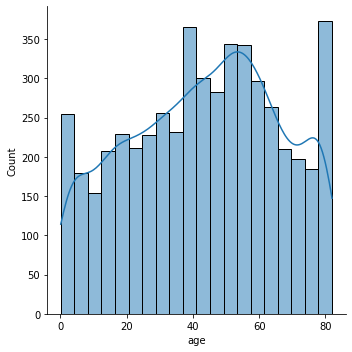

In [61]:
sns.displot(data["age"],kde=True)

## Should we drop smoking status field?

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

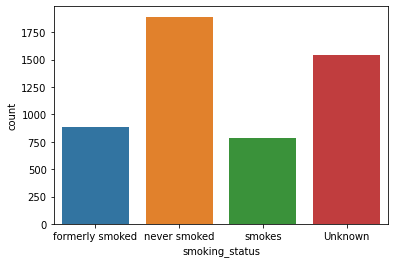

In [62]:
sns.countplot(data=data,x='smoking_status')

In [63]:
data['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

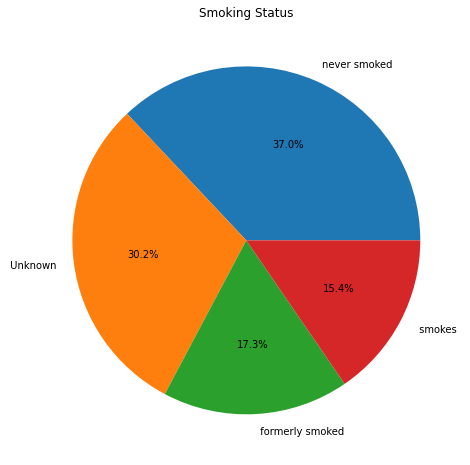

In [64]:
plt.figure(figsize=(8,8))
plt.pie(data['smoking_status'].value_counts(),labels='never smoked, Unknown, formerly smoked, smokes'.split(','),autopct='%.1f%%')
plt.title('Smoking Status')
plt.plot();

<AxesSubplot:xlabel='stroke', ylabel='count'>

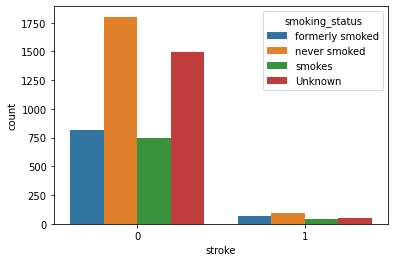

In [65]:
sns.countplot(data=data,x='stroke',hue='smoking_status')

<AxesSubplot:xlabel='work_type', ylabel='count'>

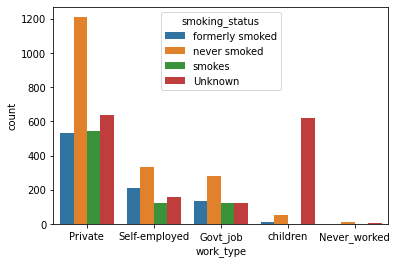

In [66]:
sns.countplot(data=data,x='work_type',hue='smoking_status')
#as we can see most of the unknwon values falls into private and children work type
#from the private work type, never smoked has the highest count, then we can initialy conclude that most of the data from 
#unknown will falls into never smoked, then the rest is equally divided to formerly smoked and smokes

In [67]:
data['smoking_status'].count()

5110

In [68]:
data['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [69]:
#lets dig deeper about this unknown data
unknown_smoking_data = data[data['smoking_status'] == 'Unknown'] 
unknown_smoking_data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
8,Female,59.0,0,0,Yes,Private,Rural,76.15,28.893237,Unknown,1
9,Female,78.0,0,0,Yes,Private,Urban,58.57,24.200000,Unknown,1
13,Male,78.0,0,1,Yes,Private,Urban,219.84,28.893237,Unknown,1
19,Male,57.0,0,1,No,Govt_job,Urban,217.08,28.893237,Unknown,1
23,Male,82.0,0,1,Yes,Private,Rural,208.30,32.500000,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...
5098,Male,9.0,0,0,No,children,Urban,71.88,17.500000,Unknown,0
5101,Female,45.0,0,0,Yes,Private,Urban,97.95,24.500000,Unknown,0
5103,Female,18.0,0,0,No,Private,Urban,82.85,46.900000,Unknown,0
5104,Female,13.0,0,0,No,children,Rural,103.08,18.600000,Unknown,0


<AxesSubplot:xlabel='stroke', ylabel='count'>

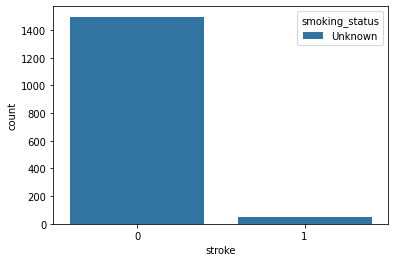

In [70]:
sns.countplot(data=unknown_smoking_data,x='stroke',hue='smoking_status')
#from unknown smoking status, the data who have stroke is less than 200

In [71]:
# According to Daniele Salerno (November 2020) on Handle missing values in Categorical Features, 
#Certainly more effective method is to assign the missing values with the most frequent data: the mode. 
#But be careful that this could lead to an unbalanced dataset if the missing values were a considerable number.
#Since in our datasets the unknown value is 30.2 percent from total smoking status data, it is safe to say that we should delete
#smoking status column

## Which features greatly influence the chance of having a stroke?

In [72]:
#since age and average glucose is one of the main factor that affect the chance of having stroke, we will use it to map our plot

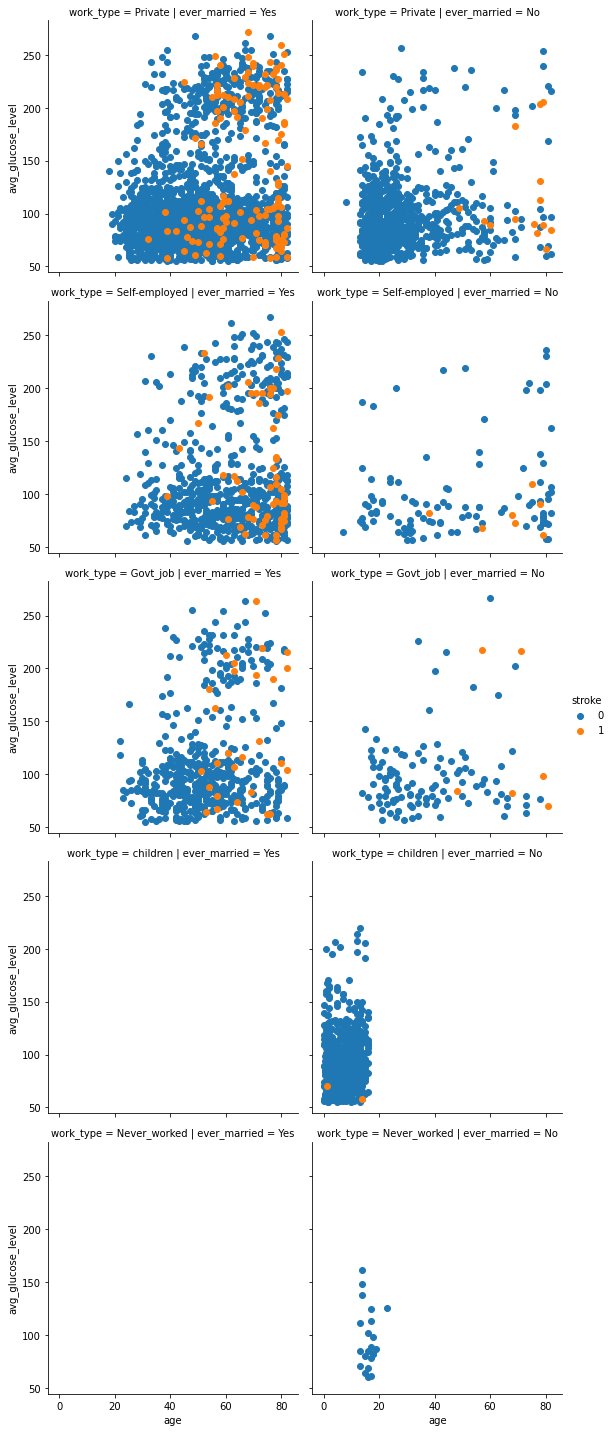

In [73]:
g = sns.FacetGrid(data, col="ever_married",  row="work_type",hue='stroke',height=4)
g = g.map(plt.scatter, "age", "avg_glucose_level").add_legend()
#g.savefig('sample.jpg') 

In [74]:
#ggggg

<Figure size 1440x1440 with 0 Axes>

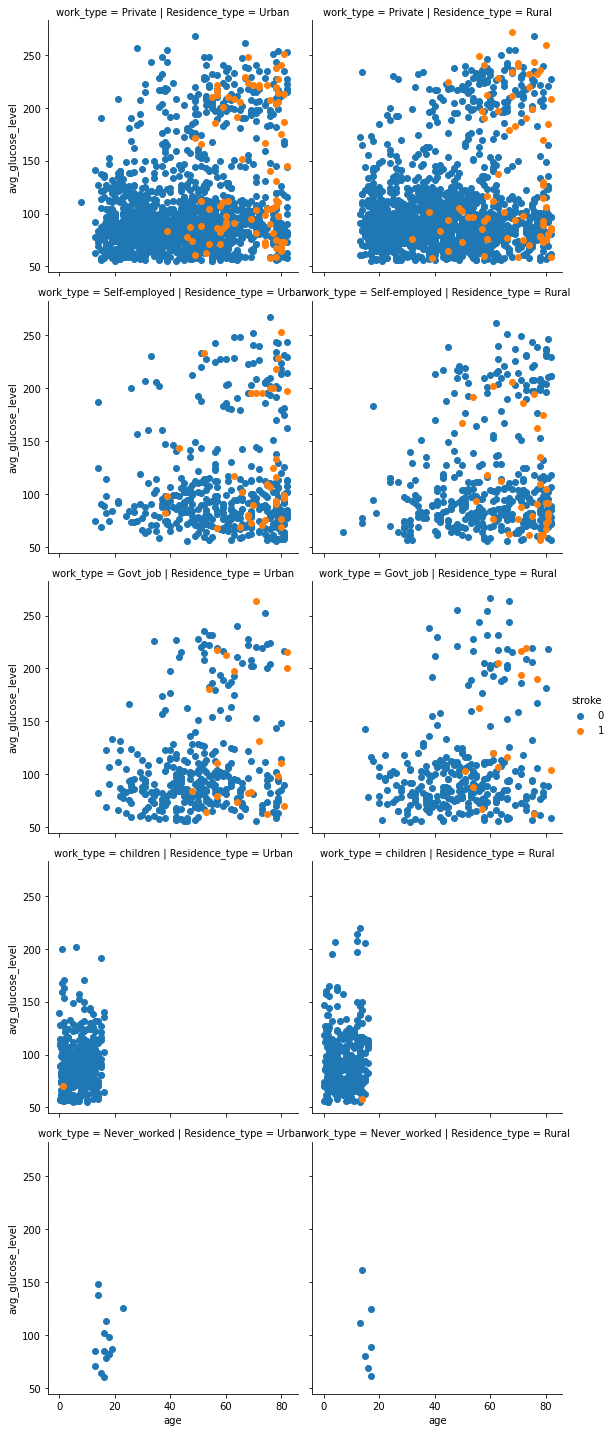

In [75]:
plt.figure(figsize=(20,20))
g = sns.FacetGrid(data, col="Residence_type",  row="work_type",hue='stroke', height=4)
g = g.map(plt.scatter, "age", "avg_glucose_level").add_legend()
#g.savefig('sample2.jpg')

In [76]:
data.drop('smoking_status',axis=1,inplace=True)

## How to handle categorical values?

In [77]:
#Option 1: Using one hot encoder
#Option 2: using get dummies

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 399.3+ KB


In [79]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
label = LabelEncoder()

data[['gender','ever_married','Residence_type']].head()

,gender,ever_married,Residence_type
0,Male,Yes,Urban
1,Female,Yes,Rural
2,Male,Yes,Rural
3,Female,Yes,Urban
4,Female,Yes,Rural


Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

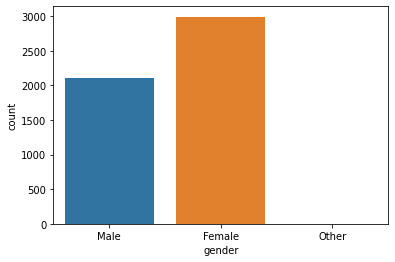

In [80]:
sns.countplot(data=data,x='gender')
data['gender'].value_counts()

In [81]:
#replace the Other to Female gender
data = data.replace({'gender':'Other'},'Female')

Female    2995
Male      2115
Name: gender, dtype: int64

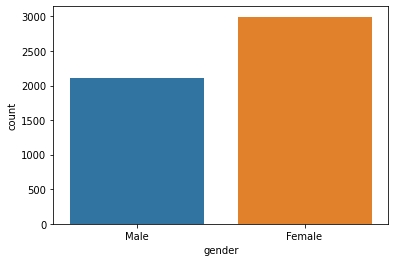

In [82]:
sns.countplot(data=data,x='gender')
data['gender'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

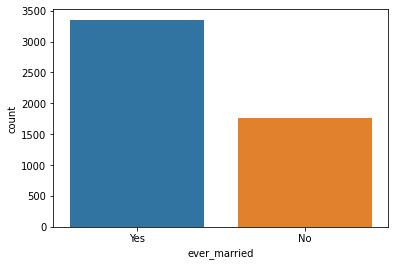

In [83]:
sns.countplot(data=data,x='ever_married')
data['ever_married'].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

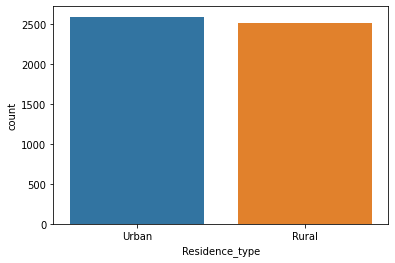

In [84]:
sns.countplot(data=data,x='Residence_type')
data['Residence_type'].value_counts()

In [85]:
data[['gender','ever_married','Residence_type']] = data[['gender','ever_married','Residence_type']].apply(label.fit_transform)

In [86]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke
0,1,67.0,0,1,1,Private,1,228.69,36.600000,1
1,0,61.0,0,0,1,Self-employed,0,202.21,28.893237,1
2,1,80.0,0,1,1,Private,0,105.92,32.500000,1
3,0,49.0,0,0,1,Private,1,171.23,34.400000,1
4,0,79.0,1,0,1,Self-employed,0,174.12,24.000000,1


<AxesSubplot:xlabel='gender', ylabel='count'>

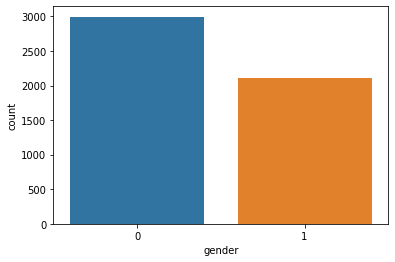

In [87]:
sns.countplot(data=data,x='gender')

<AxesSubplot:xlabel='ever_married', ylabel='count'>

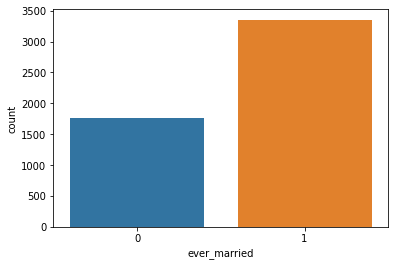

In [88]:
sns.countplot(data=data,x='ever_married')

<AxesSubplot:xlabel='Residence_type', ylabel='count'>

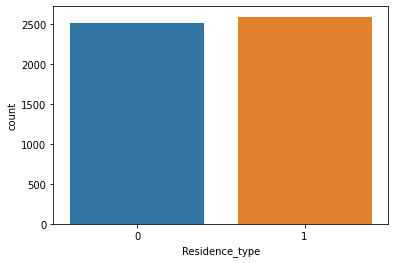

In [89]:
sns.countplot(data=data,x='Residence_type')

In [90]:
data['work_type']

0             Private
1       Self-employed
2             Private
3             Private
4       Self-employed
            ...      
5105          Private
5106    Self-employed
5107    Self-employed
5108          Private
5109         Govt_job
Name: work_type, Length: 5110, dtype: object

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

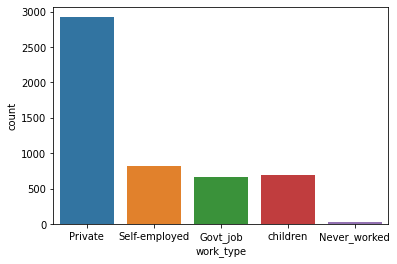

In [91]:
sns.countplot(data=data,x='work_type')
data['work_type'].value_counts()

In [92]:
data_temp = data[data['work_type']=='Never_worked']
data_temp

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke
253,1,14.0,0,0,0,Never_worked,0,161.28,19.1,0
603,1,23.0,0,0,0,Never_worked,1,125.26,18.7,0
886,0,19.0,0,0,0,Never_worked,1,86.96,25.8,0
939,1,13.0,0,0,0,Never_worked,0,111.48,20.8,0
959,1,17.0,0,0,0,Never_worked,1,113.25,23.4,0
1462,1,17.0,0,0,0,Never_worked,0,61.01,32.5,0
1789,0,13.0,0,0,0,Never_worked,1,70.93,22.9,0
1922,1,16.0,0,0,0,Never_worked,1,59.99,28.2,0
2346,0,14.0,0,0,0,Never_worked,1,148.37,22.7,0
2721,0,17.0,0,0,0,Never_worked,0,88.57,31.1,0


In [93]:
data_temp2 = data.loc[(data['work_type']=='Never_worked') & (data['age'] <= 18)].replace({'work_type':'Never_worked'},'children')

In [94]:
data_temp2

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke
253,1,14.0,0,0,0,children,0,161.28,19.1,0
939,1,13.0,0,0,0,children,0,111.48,20.8,0
959,1,17.0,0,0,0,children,1,113.25,23.4,0
1462,1,17.0,0,0,0,children,0,61.01,32.5,0
1789,0,13.0,0,0,0,children,1,70.93,22.9,0
1922,1,16.0,0,0,0,children,1,59.99,28.2,0
2346,0,14.0,0,0,0,children,1,148.37,22.7,0
2721,0,17.0,0,0,0,children,0,88.57,31.1,0
2740,1,15.0,0,0,0,children,0,79.59,28.4,0
2781,0,16.0,0,0,0,children,1,84.40,25.9,0


In [95]:
data.drop(data[(data['work_type']=='Never_worked') & (data['age'] <= 18)].index,inplace=True)

In [96]:
data[data['work_type']=='Never_worked']

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke
603,1,23.0,0,0,0,Never_worked,1,125.26,18.7,0
886,0,19.0,0,0,0,Never_worked,1,86.96,25.8,0


In [97]:
data = pd.concat([data,data_temp2],axis=0)

In [98]:
data[(data['work_type']=='children') & (data['age'] <= 18)]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke
162,0,1.32,0,0,0,children,1,70.37,28.893237,1
245,0,14.00,0,0,0,children,0,57.93,30.900000,1
249,1,3.00,0,0,0,children,0,95.12,18.000000,0
282,0,3.00,0,0,0,children,1,73.74,16.000000,0
290,1,13.00,0,0,0,children,1,114.84,18.300000,0
...,...,...,...,...,...,...,...,...,...,...
4160,0,18.00,0,0,0,children,1,81.73,21.600000,0
4410,1,13.00,0,0,0,children,1,85.08,14.600000,0
4611,0,17.00,0,0,0,children,1,78.08,44.900000,0
4772,0,18.00,0,0,0,children,1,97.65,21.500000,0


In [99]:
data[data['age']<=18]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke
162,0,1.32,0,0,0,children,1,70.37,28.893237,1
245,0,14.00,0,0,0,children,0,57.93,30.900000,1
249,1,3.00,0,0,0,children,0,95.12,18.000000,0
251,0,8.00,0,0,0,Private,1,110.89,17.600000,0
282,0,3.00,0,0,0,children,1,73.74,16.000000,0
...,...,...,...,...,...,...,...,...,...,...
4160,0,18.00,0,0,0,children,1,81.73,21.600000,0
4410,1,13.00,0,0,0,children,1,85.08,14.600000,0
4611,0,17.00,0,0,0,children,1,78.08,44.900000,0
4772,0,18.00,0,0,0,children,1,97.65,21.500000,0


Private          2925
Self-employed     819
children          707
Govt_job          657
Never_worked        2
Name: work_type, dtype: int64

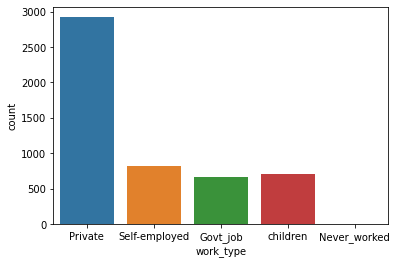

In [100]:
sns.countplot(data=data,x='work_type')
data['work_type'].value_counts()

In [101]:
data_work_type = pd.get_dummies(data['work_type'],drop_first = True)
data_work_type

,Never_worked,Private,Self-employed,children
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,1,0
...,...,...,...,...
4160,0,0,0,1
4410,0,0,0,1
4611,0,0,0,1
4772,0,0,0,1


In [102]:
data.drop('work_type',axis=1,inplace=True)

In [103]:
data = pd.concat([data,data_work_type],axis=1)

In [104]:
data

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,Never_worked,Private,Self-employed,children
0,1,67.0,0,1,1,1,228.69,36.600000,1,0,1,0,0
1,0,61.0,0,0,1,0,202.21,28.893237,1,0,0,1,0
2,1,80.0,0,1,1,0,105.92,32.500000,1,0,1,0,0
3,0,49.0,0,0,1,1,171.23,34.400000,1,0,1,0,0
4,0,79.0,1,0,1,0,174.12,24.000000,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4160,0,18.0,0,0,0,1,81.73,21.600000,0,0,0,0,1
4410,1,13.0,0,0,0,1,85.08,14.600000,0,0,0,0,1
4611,0,17.0,0,0,0,1,78.08,44.900000,0,0,0,0,1
4772,0,18.0,0,0,0,1,97.65,21.500000,0,0,0,0,1


In [105]:
#data = swap_columns(data,'stroke','children')

cols = list(data.columns)
a, b = cols.index('stroke'), cols.index('children')
cols[b], cols[a] = cols[a], cols[b]
data = data[cols]

In [106]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,children,Never_worked,Private,Self-employed,stroke
0,1,67.0,0,1,1,1,228.69,36.600000,0,0,1,0,1
1,0,61.0,0,0,1,0,202.21,28.893237,0,0,0,1,1
2,1,80.0,0,1,1,0,105.92,32.500000,0,0,1,0,1
3,0,49.0,0,0,1,1,171.23,34.400000,0,0,1,0,1
4,0,79.0,1,0,1,0,174.12,24.000000,0,0,0,1,1


In [107]:
#data.to_csv("stroke-clean-dataset.csv")

## Machine learning

In [108]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train,X_test,y_train,y_test = train_test_split(data.drop('stroke',axis=1),data['stroke'],test_size=0.2,random_state=101)

## Creating Model without using Standard Scaler

## Logistic Regression

In [109]:
accuracy = []
auc_score = []
accuracy_with_scaler = []
auc_with_scaler = []

In [110]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()

logistic.fit(X_train,y_train)

logistic_pred = logistic.predict(X_test)

D:\Programming\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [111]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, roc_auc_score
print(classification_report(y_test,logistic_pred))
print('Accuracy Score: ',accuracy_score(y_test,logistic_pred))
accuracy.append(accuracy_score(y_test,logistic_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       968
           1       0.00      0.00      0.00        54

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022

Accuracy Score:  0.9471624266144814


D:\Programming\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Programming\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Programming\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:>

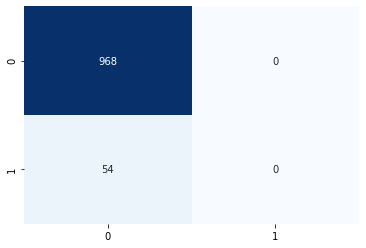

In [112]:
sns.heatmap(confusion_matrix(y_test,logistic_pred),annot=True,cbar=False,cmap='Blues',fmt='d')

In [113]:
fpr,tpr,treshold = roc_curve(y_test,logistic_pred)
print('AUC Score: ',auc(fpr,tpr))
auc_score.append(auc(fpr,tpr))

AUC Score:  0.5


## Random Forest

In [114]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train,y_train)

forest_pred = forest.predict(X_test)

In [115]:
print(classification_report(y_test,forest_pred))
print('Accuracy Score: ',accuracy_score(y_test,forest_pred))
accuracy.append(accuracy_score(y_test,forest_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       968
           1       1.00      0.04      0.07        54

    accuracy                           0.95      1022
   macro avg       0.97      0.52      0.52      1022
weighted avg       0.95      0.95      0.93      1022

Accuracy Score:  0.949119373776908


<AxesSubplot:>

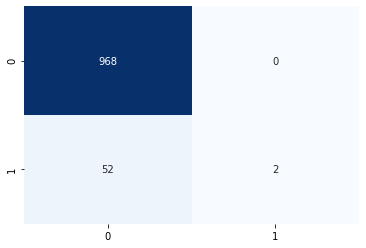

In [116]:
sns.heatmap(confusion_matrix(y_test,forest_pred),annot=True,cbar=False,cmap='Blues',fmt='d')

In [117]:
fpr,tpr,treshold = roc_curve(y_test,forest_pred)
print('AUC Score: ',auc(fpr,tpr))
auc_score.append(auc(fpr,tpr))

AUC Score:  0.5185185185185185


## SVM

In [118]:
from sklearn.svm import SVC
vector = SVC()

vector.fit(X_train,y_train)

vector_pred = vector.predict(X_test)

In [119]:
print(classification_report(y_test,vector_pred))
print('Accuracy Score: ',accuracy_score(y_test,vector_pred))
accuracy.append(accuracy_score(y_test,vector_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       968
           1       0.00      0.00      0.00        54

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022

Accuracy Score:  0.9471624266144814


D:\Programming\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Programming\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Programming\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:>

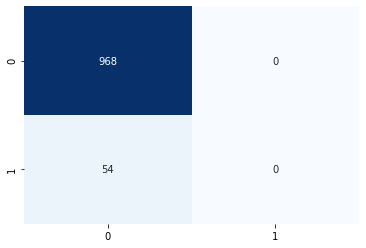

In [120]:
sns.heatmap(confusion_matrix(y_test,vector_pred),annot=True,cbar=False,cmap='Blues',fmt='d')

In [121]:
fpr,tpr,treshold = roc_curve(y_test,vector_pred)
print('AUC Score: ',auc(fpr,tpr))
auc_score.append(auc(fpr,tpr))

AUC Score:  0.5


## AdaBoost

In [122]:
ada = AdaBoostClassifier()
ada.fit(X_train,y_train)

ada_predict = ada.predict(X_test)

In [123]:
print(classification_report(y_test,ada_predict))
print('Accuracy Score: ',accuracy_score(y_test,ada_predict))
accuracy.append(accuracy_score(y_test,ada_predict))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       968
           1       0.00      0.00      0.00        54

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022

Accuracy Score:  0.9461839530332681


<AxesSubplot:>

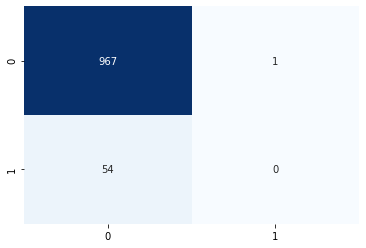

In [124]:
sns.heatmap(confusion_matrix(y_test,ada_predict),annot=True,cbar=False,cmap='Blues',fmt='d')

In [125]:
fpr,tpr,treshold = roc_curve(y_test,ada_predict)
print('AUC Score: ',auc(fpr,tpr))
auc_score.append(auc(fpr,tpr))

AUC Score:  0.4994834710743802


## Artificial Neural Network

In [126]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [127]:
model = Sequential()

In [128]:
model.add(Dense(units=34,activation='relu'))
model.add(Dense(units=34,activation='relu'))
model.add(Dense(units=34,activation='relu'))
model.add(Dense(units=34,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

In [129]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [130]:
model.fit(X_train,y_train,batch_size=32,epochs=100)

Epoch 1/100
128/128 [==============================] - 1s 1ms/step - loss: 0.5098 - accuracy: 0.8933
Epoch 2/100
128/128 [==============================] - 0s 1ms/step - loss: 0.1849 - accuracy: 0.9511
Epoch 3/100
128/128 [==============================] - 0s 1ms/step - loss: 0.1833 - accuracy: 0.9523
Epoch 4/100
128/128 [==============================] - 0s 1ms/step - loss: 0.1837 - accuracy: 0.9523
Epoch 5/100
128/128 [==============================] - 0s 1ms/step - loss: 0.1818 - accuracy: 0.9523
Epoch 6/100
128/128 [==============================] - 0s 1ms/step - loss: 0.1792 - accuracy: 0.9521
Epoch 7/100
128/128 [==============================] - 0s 2ms/step - loss: 0.1774 - accuracy: 0.9523
Epoch 8/100
128/128 [==============================] - 0s 2ms/step - loss: 0.1824 - accuracy: 0.9521
Epoch 9/100
128/128 [==============================] - 0s 2ms/step - loss: 0.1763 - accuracy: 0.9511
Epoch 10/100
128/128 [==============================] - 0s 3ms/step - loss: 0.1769 - accura

128/128 [==============================] - 0s 1ms/step - loss: 0.1547 - accuracy: 0.9523
Epoch 82/100
128/128 [==============================] - 0s 1ms/step - loss: 0.1539 - accuracy: 0.9523
Epoch 83/100
128/128 [==============================] - 0s 1ms/step - loss: 0.1521 - accuracy: 0.9523
Epoch 84/100
128/128 [==============================] - 0s 1ms/step - loss: 0.1544 - accuracy: 0.9523
Epoch 85/100
128/128 [==============================] - 0s 1ms/step - loss: 0.1545 - accuracy: 0.9523
Epoch 86/100
128/128 [==============================] - 0s 1ms/step - loss: 0.1532 - accuracy: 0.9521
Epoch 87/100
128/128 [==============================] - 0s 1ms/step - loss: 0.1551 - accuracy: 0.9523
Epoch 88/100
128/128 [==============================] - 0s 1ms/step - loss: 0.1524 - accuracy: 0.9525
Epoch 89/100
128/128 [==============================] - 0s 2ms/step - loss: 0.1526 - accuracy: 0.9525
Epoch 90/100
128/128 [==============================] - 0s 2ms/step - loss: 0.1525 - accuracy: 

In [131]:
ann_pred = model.predict(X_test)
ann_pred = ann_pred > 0.5

In [132]:
print(classification_report(y_test,ann_pred))
print('Accuracy Score: ',accuracy_score(y_test,ann_pred))
accuracy.append(accuracy_score(y_test,ann_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       968
           1       0.00      0.00      0.00        54

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022

Accuracy Score:  0.9471624266144814


D:\Programming\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Programming\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Programming\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:>

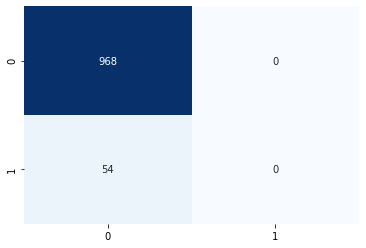

In [133]:
sns.heatmap(confusion_matrix(y_test,ann_pred),cbar=False,annot=True,fmt='d',cmap='Blues')

In [134]:
fpr,tpr,treshold = roc_curve(y_test,ann_pred)
print('AUC Score: ',auc(fpr,tpr))
auc_score.append(auc(fpr,tpr))

AUC Score:  0.5


## Does Standard Scaler improve the accuracy of our model?

In [135]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Models with Standard Scaler

## Logistic Regression

In [136]:
logistic = LogisticRegression()

logistic.fit(X_train,y_train)

logistic_pred = logistic.predict(X_test)

In [137]:
print(classification_report(y_test,logistic_pred))
print('Accuracy Score: ',accuracy_score(y_test,logistic_pred))
accuracy_with_scaler.append(accuracy_score(y_test,logistic_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       968
           1       0.00      0.00      0.00        54

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022

Accuracy Score:  0.9471624266144814


D:\Programming\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Programming\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Programming\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:>

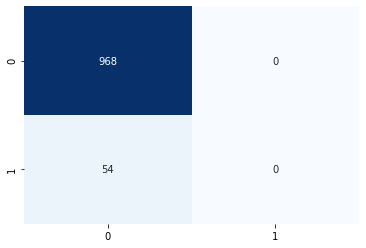

In [138]:
sns.heatmap(confusion_matrix(y_test,logistic_pred),cmap='Blues',annot=True,fmt='d',cbar=False)

In [139]:
fpr,tpr,treshold = roc_curve(y_test,logistic_pred)
print('AUC Score: ',auc(fpr,tpr))
auc_with_scaler.append(auc(fpr,tpr))

AUC Score:  0.5


## Random Forest

In [140]:
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train,y_train)

forest_pred = forest.predict(X_test)


In [141]:
print(classification_report(y_test,forest_pred))
print('Accuracy Score: ',accuracy_score(y_test,forest_pred))
accuracy_with_scaler.append(accuracy_score(y_test,forest_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       968
           1       0.00      0.00      0.00        54

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022

Accuracy Score:  0.9461839530332681


<AxesSubplot:>

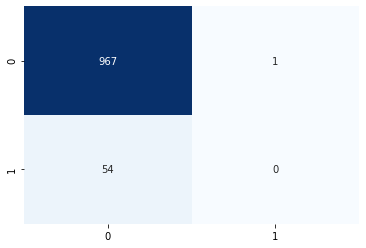

In [142]:
sns.heatmap(confusion_matrix(y_test,forest_pred),annot=True,cmap='Blues',fmt='d',cbar=False)

In [143]:
fpr,tpr,treshold = roc_curve(y_test,forest_pred)
print('AUC Score: ',auc(fpr,tpr))
auc_with_scaler.append(auc(fpr,tpr))

AUC Score:  0.4994834710743802


## SVM

In [144]:
vector = SVC()
vector.fit(X_train,y_train)

vector_pred = vector.predict(X_test)

In [145]:
print(classification_report(y_test,vector_pred))
print(confusion_matrix(y_test,vector_pred))
print('Accuracy Score: ',accuracy_score(y_test,vector_pred))
accuracy_with_scaler.append(accuracy_score(y_test,vector_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       968
           1       0.00      0.00      0.00        54

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022

[[968   0]
 [ 54   0]]
Accuracy Score:  0.9471624266144814


D:\Programming\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Programming\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Programming\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [146]:
fpr,tpr,treshold = roc_curve(y_test,vector_pred)
print('AUC Score: ',auc(fpr,tpr))
auc_with_scaler.append(auc(fpr,tpr))

AUC Score:  0.5


## AdaBoost

In [147]:
ada = AdaBoostClassifier(n_estimators=100)
ada.fit(X_train,y_train)

ada_pred = ada.predict(X_test)

In [148]:
print(classification_report(y_test,ada_pred))
print('Accuracy Score: ',accuracy_score(y_test,ada_pred))
accuracy_with_scaler.append(accuracy_score(y_test,ada_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       968
           1       0.67      0.04      0.07        54

    accuracy                           0.95      1022
   macro avg       0.81      0.52      0.52      1022
weighted avg       0.93      0.95      0.93      1022

Accuracy Score:  0.9481409001956947


<AxesSubplot:>

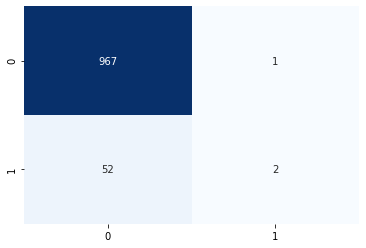

In [149]:
sns.heatmap(confusion_matrix(y_test,ada_pred),annot=True,cmap='Blues',fmt='d',cbar=False)

In [150]:
fpr,tpr,treshold = roc_curve(y_test,ada_pred)
print('AUC Score: ',auc(fpr,tpr))
auc_with_scaler.append(auc(fpr,tpr))

AUC Score:  0.5180019895928987


## Artificial Neural Network

In [151]:
model = Sequential()

In [152]:
model.add(Dense(units=34,activation='relu'))
model.add(Dense(units=34,activation='relu'))
model.add(Dense(units=34,activation='relu'))
model.add(Dense(units=34,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

In [153]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [154]:
model.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
128/128 [==============================] - 1s 1ms/step - loss: 0.2471 - accuracy: 0.9484
Epoch 2/100
128/128 [==============================] - 0s 1ms/step - loss: 0.1603 - accuracy: 0.9523
Epoch 3/100
128/128 [==============================] - 0s 2ms/step - loss: 0.1560 - accuracy: 0.9523
Epoch 4/100
128/128 [==============================] - 0s 2ms/step - loss: 0.1513 - accuracy: 0.9523
Epoch 5/100
128/128 [==============================] - 0s 2ms/step - loss: 0.1510 - accuracy: 0.9523
Epoch 6/100
128/128 [==============================] - 0s 1ms/step - loss: 0.1485 - accuracy: 0.9523
Epoch 7/100
128/128 [==============================] - 0s 1ms/step - loss: 0.1469 - accuracy: 0.9523
Epoch 8/100
128/128 [==============================] - 0s 1ms/step - loss: 0.1456 - accuracy: 0.9523
Epoch 9/100
128/128 [==============================] - 0s 1ms/step - loss: 0.1448 - accuracy: 0.9521
Epoch 10/100
128/128 [==============================] - 0s 1ms/step - loss: 0.1425 - accura

128/128 [==============================] - 0s 1ms/step - loss: 0.0833 - accuracy: 0.9655
Epoch 82/100
128/128 [==============================] - 0s 1ms/step - loss: 0.0856 - accuracy: 0.9640
Epoch 83/100
128/128 [==============================] - 0s 1ms/step - loss: 0.0855 - accuracy: 0.9636
Epoch 84/100
128/128 [==============================] - 0s 1ms/step - loss: 0.0853 - accuracy: 0.9650
Epoch 85/100
128/128 [==============================] - 0s 1ms/step - loss: 0.0812 - accuracy: 0.9648
Epoch 86/100
128/128 [==============================] - 0s 1ms/step - loss: 0.0815 - accuracy: 0.9648
Epoch 87/100
128/128 [==============================] - 0s 1ms/step - loss: 0.0812 - accuracy: 0.9640
Epoch 88/100
128/128 [==============================] - 0s 1ms/step - loss: 0.0805 - accuracy: 0.9653
Epoch 89/100
128/128 [==============================] - 0s 1ms/step - loss: 0.0809 - accuracy: 0.9640
Epoch 90/100
128/128 [==============================] - 0s 1ms/step - loss: 0.0817 - accuracy: 

In [155]:
ann_pred = model.predict(X_test)
ann_pred = ann_pred > 0.5

In [156]:
print(classification_report(y_test,ann_pred))
print('Accuracy Score: ',accuracy_score(y_test,ann_pred))
accuracy_with_scaler.append(accuracy_score(y_test,ann_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       968
           1       0.15      0.06      0.08        54

    accuracy                           0.93      1022
   macro avg       0.55      0.52      0.52      1022
weighted avg       0.91      0.93      0.92      1022

Accuracy Score:  0.9334637964774951


<AxesSubplot:>

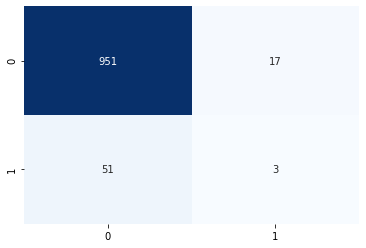

In [157]:
sns.heatmap(confusion_matrix(y_test,ann_pred),annot=True,cmap='Blues',fmt='d',cbar=False)

In [158]:
fpr,tpr,treshold = roc_curve(y_test,ann_pred)
print('AUC Score: ',auc(fpr,tpr))
auc_with_scaler.append(auc(fpr,tpr))

AUC Score:  0.5189967860422406


In [159]:
accuracy

[0.9471624266144814,
 0.949119373776908,
 0.9471624266144814,
 0.9461839530332681,
 0.9471624266144814]

In [160]:
auc_score

[0.5, 0.5185185185185185, 0.5, 0.4994834710743802, 0.5]

In [161]:
accuracy_with_scaler

[0.9471624266144814,
 0.9461839530332681,
 0.9471624266144814,
 0.9481409001956947,
 0.9334637964774951]

In [162]:
auc_with_scaler

[0.5, 0.4994834710743802, 0.5, 0.5180019895928987, 0.5189967860422406]

In [163]:
accuracies = pd.DataFrame({'Accuracy Score':accuracy,'AUC Score':auc_score},index = 'Logistic Regression,Random Forest,SVM,AdaBoost,Artificial Neural Network'.split(','))

In [164]:
accuracies

,Accuracy Score,AUC Score
Logistic Regression,0.947162,0.500000
Random Forest,0.949119,0.518519
SVM,0.947162,0.500000
AdaBoost,0.946184,0.499483
Artificial Neural Network,0.947162,0.500000


<Figure size 1080x2160 with 0 Axes>

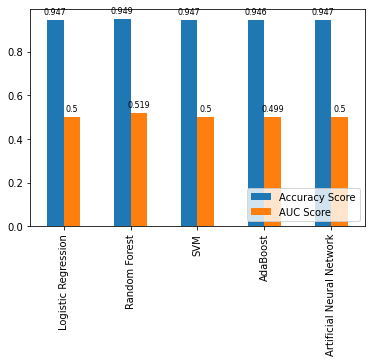

In [165]:
plt.figure(figsize=(15,30))
temp = accuracies.plot.bar()
for p in temp.patches:
    temp.annotate(f'{p.get_height():.3g}',
                   (p.get_x() + p.get_width() / 2.0,
                    p.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')
    
plt.legend(loc='lower right')
#plt.tight_layout()
plt.show()

## Does Oversampling helps increase the accuracy of the models?

In [166]:
accuracy_sampling = []
auc_sampling = []

In [167]:
fpr_score = []
tpr_score = []

<AxesSubplot:xlabel='stroke', ylabel='count'>

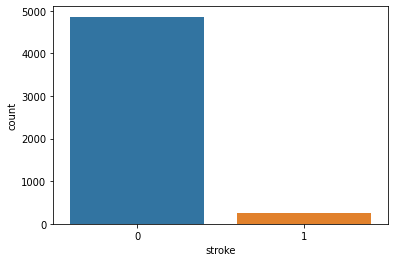

In [168]:
sns.countplot(data=data,x='stroke')

In [169]:
X = data.drop('stroke',axis=1)
y = data['stroke']

In [170]:
from imblearn.over_sampling import RandomOverSampler
sampling = RandomOverSampler()

X_oversampling, y_oversampling = sampling.fit_resample(X,y)

In [171]:
data_new = pd.concat([X_oversampling, y_oversampling],axis=1)

In [172]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9722 entries, 0 to 9721
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             9722 non-null   int32  
 1   age                9722 non-null   float64
 2   hypertension       9722 non-null   int64  
 3   heart_disease      9722 non-null   int64  
 4   ever_married       9722 non-null   int32  
 5   Residence_type     9722 non-null   int32  
 6   avg_glucose_level  9722 non-null   float64
 7   bmi                9722 non-null   float64
 8   children           9722 non-null   uint8  
 9   Never_worked       9722 non-null   uint8  
 10  Private            9722 non-null   uint8  
 11  Self-employed      9722 non-null   uint8  
 12  stroke             9722 non-null   int64  
dtypes: float64(3), int32(3), int64(3), uint8(4)
memory usage: 607.8 KB


<AxesSubplot:xlabel='stroke', ylabel='count'>

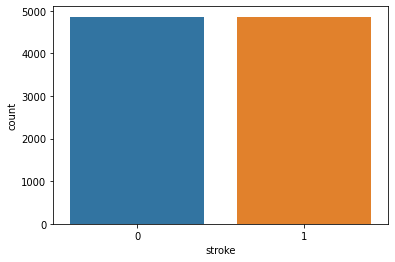

In [173]:
sns.countplot(data=data_new,x='stroke')

In [174]:
X_train_new,X_test_new,y_train_new,y_test_new = train_test_split(data_new.drop('stroke',axis=1),data_new['stroke'],test_size=0.2,random_state=101)

In [175]:
X_train_new = sc.fit_transform(X_train_new)
X_test_new = sc.transform(X_test_new)

## Logistic Regression

In [176]:
logistic = LogisticRegression()

logistic.fit(X_train_new,y_train_new)

logistic_pred = logistic.predict(X_test_new)

In [177]:
print(classification_report(y_test_new,logistic_pred))
print('Accuracy Score: ',accuracy_score(y_test_new,logistic_pred))
accuracy_sampling.append(accuracy_score(y_test_new,logistic_pred))

              precision    recall  f1-score   support

           0       0.79      0.74      0.76       997
           1       0.74      0.79      0.77       948

    accuracy                           0.76      1945
   macro avg       0.77      0.77      0.76      1945
weighted avg       0.77      0.76      0.76      1945

Accuracy Score:  0.7645244215938304


<AxesSubplot:>

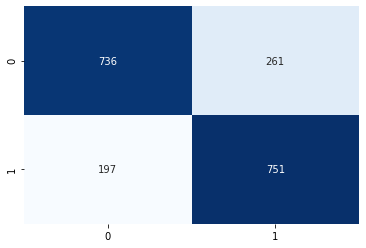

In [178]:
sns.heatmap(confusion_matrix(y_test_new,logistic_pred),annot=True,cmap='Blues',fmt='d',cbar=False)

In [179]:
fpr, tpr, treshold = roc_curve(y_test_new,logistic_pred)
print(auc(fpr,tpr))
auc_sampling.append(auc(fpr,tpr))
fpr_score.append(fpr)
tpr_score.append(tpr)

0.7652043683793998


## Random Forest

In [180]:
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train_new,y_train_new)

forest_pred = forest.predict(X_test_new)

In [181]:
print(classification_report(y_test_new,forest_pred))
print(accuracy_score(y_test_new,forest_pred))
accuracy_sampling.append(accuracy_score(y_test_new,forest_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       997
           1       0.98      1.00      0.99       948

    accuracy                           0.99      1945
   macro avg       0.99      0.99      0.99      1945
weighted avg       0.99      0.99      0.99      1945

0.9922879177377892


<AxesSubplot:>

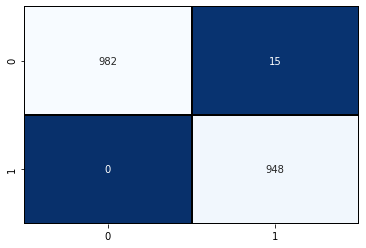

In [182]:
sns.heatmap(confusion_matrix(y_test_new,forest_pred),annot=True,cbar=False,fmt='d',cmap='Blues_r',linecolor='black',linewidth=0.1,)

In [183]:
fpr, tpr, treshold = roc_curve(y_test_new,forest_pred)
print(auc(fpr,tpr))
print(roc_auc_score(y_test_new,forest_pred))
auc_sampling.append(auc(fpr,tpr))
fpr_score.append(fpr)
tpr_score.append(tpr)

0.9924774322968907
0.9924774322968907


## SVM

In [184]:
vector = SVC()
vector.fit(X_train_new,y_train_new)

vector_pred = vector.predict(X_test_new)

In [185]:
print(classification_report(y_test_new,vector_pred))
print('Accuracy Score: ',accuracy_score(y_test_new,vector_pred))
accuracy_sampling.append(accuracy_score(y_test_new,vector_pred))

              precision    recall  f1-score   support

           0       0.85      0.76      0.80       997
           1       0.78      0.86      0.81       948

    accuracy                           0.81      1945
   macro avg       0.81      0.81      0.81      1945
weighted avg       0.81      0.81      0.81      1945

Accuracy Score:  0.8097686375321337


<AxesSubplot:>

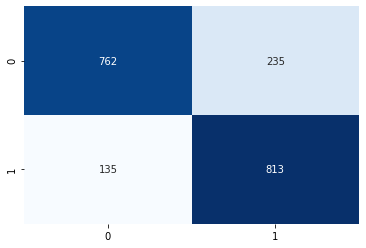

In [186]:
sns.heatmap(confusion_matrix(y_test_new,vector_pred),annot=True,cmap='Blues',fmt='d',cbar=False)

In [187]:
fpr, tpr, treshold = roc_curve(y_test_new,vector_pred)
print(auc(fpr,tpr))
auc_sampling.append(auc(fpr,tpr))
fpr_score.append(fpr)
tpr_score.append(tpr)

0.8109439076723843


## AdaBoost

In [188]:
ada = AdaBoostClassifier(n_estimators=100)
ada.fit(X_train_new,y_train_new)

ada_pred = ada.predict(X_test_new)

In [189]:
print(classification_report(y_test_new,ada_pred))
print('Accuracy Score: ',accuracy_score(y_test_new,ada_pred))
accuracy_sampling.append(accuracy_score(y_test_new,ada_pred))

              precision    recall  f1-score   support

           0       0.86      0.74      0.80       997
           1       0.76      0.87      0.81       948

    accuracy                           0.80      1945
   macro avg       0.81      0.81      0.80      1945
weighted avg       0.81      0.80      0.80      1945

Accuracy Score:  0.8046272493573264


<AxesSubplot:>

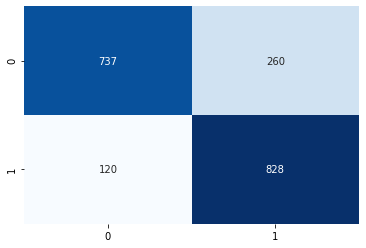

In [190]:
sns.heatmap(confusion_matrix(y_test_new,ada_pred),annot=True,cmap='Blues',fmt='d',cbar=False)

In [191]:
fpr, tpr, treshold = roc_curve(y_test_new,ada_pred)
print(auc(fpr,tpr))
auc_sampling.append(auc(fpr,tpr))
fpr_score.append(fpr)
tpr_score.append(tpr)

0.8063176872389319


## Artificial Neural Network

In [192]:
model = Sequential()

In [193]:
model.add(Dense(units=34,activation='relu'))
model.add(Dense(units=34,activation='relu'))
model.add(Dense(units=34,activation='relu'))
model.add(Dense(units=34,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

In [194]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [195]:
model.fit(X_train_new,y_train_new,epochs=100,batch_size=100)

Epoch 1/100
78/78 [==============================] - 1s 2ms/step - loss: 0.5561 - accuracy: 0.7378
Epoch 2/100
78/78 [==============================] - 0s 2ms/step - loss: 0.4693 - accuracy: 0.7800
Epoch 3/100
78/78 [==============================] - 0s 2ms/step - loss: 0.4502 - accuracy: 0.7905
Epoch 4/100
78/78 [==============================] - 0s 2ms/step - loss: 0.4364 - accuracy: 0.7972
Epoch 5/100
78/78 [==============================] - 0s 2ms/step - loss: 0.4187 - accuracy: 0.7986
Epoch 6/100
78/78 [==============================] - 0s 1ms/step - loss: 0.4050 - accuracy: 0.8116
Epoch 7/100
78/78 [==============================] - 0s 1ms/step - loss: 0.3899 - accuracy: 0.8215
Epoch 8/100
78/78 [==============================] - 0s 1ms/step - loss: 0.3763 - accuracy: 0.8349
Epoch 9/100
78/78 [==============================] - 0s 1ms/step - loss: 0.3641 - accuracy: 0.8377
Epoch 10/100
78/78 [==============================] - 0s 1ms/step - loss: 0.3549 - accuracy: 0.8429
Epoch 11/

78/78 [==============================] - 0s 1ms/step - loss: 0.0931 - accuracy: 0.9717
Epoch 84/100
78/78 [==============================] - 0s 1ms/step - loss: 0.1009 - accuracy: 0.9689
Epoch 85/100
78/78 [==============================] - 0s 1ms/step - loss: 0.1072 - accuracy: 0.9663
Epoch 86/100
78/78 [==============================] - 0s 1ms/step - loss: 0.0990 - accuracy: 0.9695
Epoch 87/100
78/78 [==============================] - 0s 1ms/step - loss: 0.0901 - accuracy: 0.9733
Epoch 88/100
78/78 [==============================] - 0s 1ms/step - loss: 0.0937 - accuracy: 0.9718
Epoch 89/100
78/78 [==============================] - 0s 1ms/step - loss: 0.1010 - accuracy: 0.9684
Epoch 90/100
78/78 [==============================] - 0s 1ms/step - loss: 0.0911 - accuracy: 0.9733
Epoch 91/100
78/78 [==============================] - 0s 1ms/step - loss: 0.0883 - accuracy: 0.9745
Epoch 92/100
78/78 [==============================] - 0s 1ms/step - loss: 0.0840 - accuracy: 0.9739
Epoch 93/100


In [196]:
ann_pred = model.predict(X_test_new)
ann_pred = ann_pred > 0.5

In [197]:
print(classification_report(y_test_new,ann_pred))
print(confusion_matrix(y_test_new,ann_pred))
print('Accuracy Score: ',accuracy_score(y_test_new,ann_pred))
accuracy_sampling.append(accuracy_score(y_test_new,ann_pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96       997
           1       0.92      1.00      0.96       948

    accuracy                           0.96      1945
   macro avg       0.96      0.96      0.96      1945
weighted avg       0.96      0.96      0.96      1945

[[915  82]
 [  0 948]]
Accuracy Score:  0.957840616966581


<AxesSubplot:>

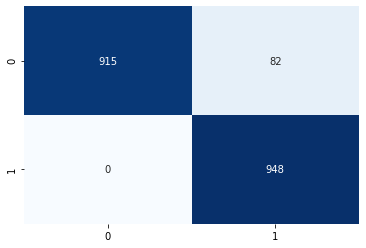

In [198]:
sns.heatmap(confusion_matrix(y_test_new,ann_pred),annot=True,cmap='Blues',fmt='d',cbar=False)

In [199]:
fpr, tpr, treshold = roc_curve(y_test_new,ann_pred)
print(auc(fpr,tpr))
auc_sampling.append(auc(fpr,tpr))
fpr_score.append(fpr)
tpr_score.append(tpr)

0.9588766298896689


In [200]:
accuracy_sampling

[0.7645244215938304,
 0.9922879177377892,
 0.8097686375321337,
 0.8046272493573264,
 0.957840616966581]

In [201]:
auc_sampling

[0.7652043683793998,
 0.9924774322968907,
 0.8109439076723843,
 0.8063176872389319,
 0.9588766298896689]

In [202]:
accuracy_sampling = pd.DataFrame({'Accuracy Score(Over sampling)':accuracy_sampling,'AUC Score(Over sampling)':auc_sampling},
                                 index = 'Logistic Regression,Random Forest,SVM,AdaBoost,Artificial Neural Network'.split(','))

In [203]:
accuracy_sampling

,Accuracy Score(Over sampling),AUC Score(Over sampling)
Logistic Regression,0.764524,0.765204
Random Forest,0.992288,0.992477
SVM,0.809769,0.810944
AdaBoost,0.804627,0.806318
Artificial Neural Network,0.957841,0.958877


In [204]:
models_score = pd.concat([accuracies,accuracy_sampling],axis=1)

In [205]:
models_score

,Accuracy Score,AUC Score,Accuracy Score(Over sampling),AUC Score(Over sampling)
Logistic Regression,0.947162,0.500000,0.764524,0.765204
Random Forest,0.949119,0.518519,0.992288,0.992477
SVM,0.947162,0.500000,0.809769,0.810944
AdaBoost,0.946184,0.499483,0.804627,0.806318
Artificial Neural Network,0.947162,0.500000,0.957841,0.958877


<Figure size 2160x2160 with 0 Axes>

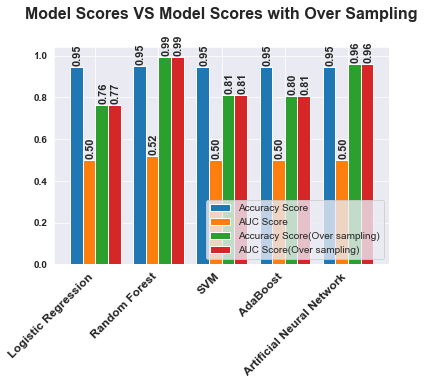

In [206]:
sns.set_style('darkgrid')
plt.figure(figsize=(30,30))
temp = models_score.plot.bar(width=0.8)
for p in temp.patches:
    temp.annotate(f'{p.get_height():.2f}', #.3g for decimal
                   (p.get_x() + p.get_width() / 2.0,
                    p.get_height()), ha='center', va='center', rotation = 90, fontweight='bold',
                   size=11, xytext=(1.5, 12), 
                   textcoords='offset points')

plt.legend(loc='lower right')
plt.title('Model Scores VS Model Scores with Over Sampling',x=0.5, y=1.1,fontsize=16,fontweight='bold')
#plt.xlabel('Machine Learning Models',fontsize=14,fontweight='bold')
plt.xticks(rotation=45,horizontalalignment='right',fontsize=12,fontweight='bold')
plt.yticks(fontweight='bold')
#plt.tight_layout()
plt.show()

In [207]:
#roc curve

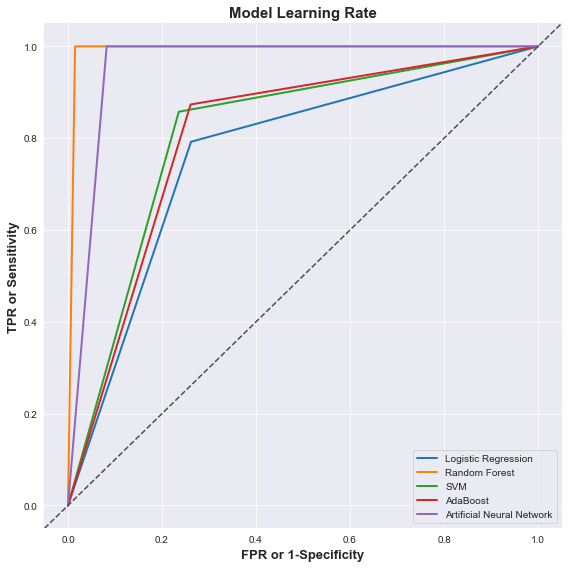

In [208]:
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(fpr_score[0],tpr_score[0], lw=2, label='Logistic Regression')
ax.plot(fpr_score[1],tpr_score[1], lw=2, label='Random Forest')
ax.plot(fpr_score[2],tpr_score[2], lw=2, label='SVM')
ax.plot(fpr_score[3],tpr_score[3], lw=2, label='AdaBoost')
ax.plot(fpr_score[4],tpr_score[4], lw=2, label='Artificial Neural Network')
ax.plot([0,1], [0,1], transform = ax.transAxes, ls="--", c="0.3")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
#plt.xlim(0.0, 1.0)
#plt.ylim(0.0, 1.0)
plt.title('Model Learning Rate',fontsize=15,fontweight='bold')
plt.xlabel("FPR or 1-Specificity",fontsize=13,fontweight='bold')
plt.ylabel("TPR or Sensitivity",fontsize=13,fontweight='bold')
plt.rcParams["font.size"] = 10
plt.grid(True)
plt.legend(loc='best')
plt.tight_layout()
#plt.savefig('model_learning_rate.jpg')
plt.show()